In [87]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [2]:
from tensorflow import keras

import tensorflow as tf
import random as python_random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy as sp
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import RandomizedSearchCV

from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from matplotlib.patches import Arrow

%matplotlib inline

In [3]:
import element_counter

In [4]:
df = pd.read_csv('lithium-ion-batteries.csv')

In [5]:
df

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic
...,...,...,...,...,...,...,...,...,...,...,...
334,mp-764961,Li6Co(SiO4)2,P1,-2.545,0.071,2.685,17,2.753,171.772,True,triclinic
335,mp-849520,LiCo3(SiO4)2,P1,-2.250,0.076,0.005,42,3.318,552.402,True,triclinic
336,mp-849656,Li5Co4(Si3O10)2,P1,-2.529,0.082,0.176,35,2.940,428.648,True,triclinic
337,mp-763557,LiCoSiO4,P1,-2.348,0.087,1.333,14,2.451,214.044,True,triclinic


In [6]:
le = LabelEncoder()
le.fit(df['Crystal System'].values)
list(le.classes_)

['monoclinic', 'orthorhombic', 'triclinic']

In [7]:
y_encode = le.transform(df['Crystal System'].values)
y_encode

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [8]:
output = pd.DataFrame()
for i in df['Formula']:
    dictionary = element_counter.element_count(i)
    output = output.append(dictionary, ignore_index=True)

In [9]:
output

,Li,Si,Mn,Fe,O,Co
0,2.0,1.0,1.0,0.0,4.0,0.0
1,2.0,1.0,1.0,0.0,4.0,0.0
2,4.0,2.0,1.0,0.0,7.0,0.0
3,4.0,3.0,2.0,0.0,10.0,0.0
4,2.0,3.0,3.0,0.0,10.0,0.0
...,...,...,...,...,...,...
334,6.0,2.0,0.0,0.0,8.0,1.0
335,1.0,2.0,0.0,0.0,8.0,3.0
336,5.0,6.0,0.0,0.0,20.0,4.0
337,1.0,1.0,0.0,0.0,4.0,1.0


In [10]:
dataframe = df.join(output)

In [11]:
dataframe

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System,Li,Si,Mn,Fe,O,Co
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic,2.0,1.0,1.0,0.0,4.0,0.0
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic,2.0,1.0,1.0,0.0,4.0,0.0
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic,4.0,2.0,1.0,0.0,7.0,0.0
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic,4.0,3.0,2.0,0.0,10.0,0.0
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic,2.0,3.0,3.0,0.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,mp-764961,Li6Co(SiO4)2,P1,-2.545,0.071,2.685,17,2.753,171.772,True,triclinic,6.0,2.0,0.0,0.0,8.0,1.0
335,mp-849520,LiCo3(SiO4)2,P1,-2.250,0.076,0.005,42,3.318,552.402,True,triclinic,1.0,2.0,0.0,0.0,8.0,3.0
336,mp-849656,Li5Co4(Si3O10)2,P1,-2.529,0.082,0.176,35,2.940,428.648,True,triclinic,5.0,6.0,0.0,0.0,20.0,4.0
337,mp-763557,LiCoSiO4,P1,-2.348,0.087,1.333,14,2.451,214.044,True,triclinic,1.0,1.0,0.0,0.0,4.0,1.0


In [15]:
y = dataframe['Crystal System'].copy()
labels_map = {'monoclinic':0,'orthorhombic':1, 'triclinic':2}
y_int = y.map(labels_map)

In [16]:
x = dataframe[['Li', 'Si', 'Mn', 'Fe', 'O', 'Co', 'Formation Energy (eV)', 'Band Gap (eV)', 'Nsites', 'Density (gm/cc)', 'Volume']].values
y = y_int
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.20,
                                                    )

scaler = StandardScaler().fit(x_train)
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

In [88]:
def multi_nn_builder0(optimizer,learning_rate):
    
    '''
    This is a builder function to define and compile a neural network
    
    Parameters:
        optimizer: a string specifies the optimizer to be used. It can be set to 'Adam' or 'SGD'.
        learning_rate: a float number specifies the learning rate.
    '''
    
    model = Sequential()
    model.add(Input(shape=x_train_norm.shape[1]))
    model.add(Dense(7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(23, kernel_initializer='normal', activation='relu'))
#    model.add(Dense(15, kernel_initializer='normal', activation='relu'))
    model.add(Dense(3, kernel_initializer='normal', activation='softmax'))
    
    if optimizer=='Adam':
        optimizer = keras.optimizers.Adam(lr=learning_rate)
    elif optimizer=='SGD':
        optimizer = keras.optimizers.SGD(lr=learning_rate)
        
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])
    
    return model

In [89]:
# set the build function to be binary_nn_builder
# set the default value of batch_size to be 32

classifier_search = KerasClassifier(build_fn=multi_nn_builder0,
                                    batch_size=32)

In [90]:
# a dictionary that gives the searching range for each parameters
parameters = {
    "optimizer": ['Adam','SGD'],
    "batch_size": np.arange(1,10000).tolist(),
    "learning_rate":(0.1,0.01,0.001,0.0001, 0.00001)
}

In [91]:
# define the randomized search
rnd_search_cv = RandomizedSearchCV(estimator=classifier_search,param_distributions=parameters,n_iter=20,cv=3,verbose=0,n_jobs=-1)

In [92]:
# perform the random search on our training data
rnd_search_cv.fit(x_train_norm, y_train,verbose=0,epochs=100)

2022-03-01 20:33:44.988264: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-01 20:33:44.991441: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-01 20:33:44.996255: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorF

1/1 [==============================] - 0s 80ms/step - loss: 1.0959 - accuracy: 0.4286


1/1 [==============================] - 0s 101ms/step - loss: 1.0788 - accuracy: 0.4286


1/1 [==============================] - 0s 122ms/step - loss: 2.0790 - accuracy: 0.5275


1/1 [==============================] - 0s 99ms/step - loss: 7.3541 - accuracy: 0.5333


1/1 [==============================] - 0s 154ms/step - loss: 1.0982 - accuracy: 0.3626


1/1 [==============================] - 0s 49ms/step - loss: 1.0978 - accuracy: 0.4505


RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fa702d31100>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'batch_size': [1, 2, 3, 4, 5, 6, 7, 8,
                                                       9, 10, 11, 12, 13, 14,
                                                       15, 16, 17, 18, 19, 20,
                                                       21, 22, 23, 24, 25, 26,
                                                       27, 28, 29, 30, ...],
                                        'learning_rate': (0.1, 0.01, 0.001,
                                                          0.0001, 1e-05),
                                        'optimizer': ['Adam', 'SGD']})

In [93]:
rnd_search_cv.best_params_

{'optimizer': 'Adam', 'learning_rate': 0.01, 'batch_size': 7014}

In [94]:
def multi_nn_builder(num_neurons1, num_neurons2):
    
    model = Sequential()
    model.add(Input(shape=x_train_norm.shape[1]))
    model.add(Dense(num_neurons1, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_neurons2, kernel_initializer='normal', activation='relu'))
#    model.add(Dense(num_neurons3, kernel_initializer='normal', activation='relu'))
#    model.add(Dense(num_neurons4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(3, kernel_initializer='normal', activation='softmax'))
    
    optimizer = keras.optimizers.Adam(lr=0.01)
        
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])
    
    return model

In [95]:
classifier_search1 = KerasClassifier(build_fn=multi_nn_builder,
                                    batch_size=7014)

In [96]:
parameters1 = {
    "num_neurons1": np.arange(1,50).tolist(),
    "num_neurons2": np.arange(1,50).tolist(),
#    "num_neurons3": np.arange(1,50).tolist(),
#    "num_neurons4": np.arange(1,1000).tolist()
}

In [97]:
rnd_search_cv1 = RandomizedSearchCV(estimator=classifier_search1,param_distributions=parameters1,n_iter=20,cv=3,verbose=0,n_jobs=-1)

In [98]:
rnd_search_cv1.fit(x_train_norm, y_train,verbose=0,epochs=100)

1/1 [==============================] - 0s 84ms/step - loss: 3.1966 - accuracy: 0.5385


1/1 [==============================] - 0s 157ms/step - loss: 3.0339 - accuracy: 0.5333


1/1 [==============================] - 0s 89ms/step - loss: 1.7323 - accuracy: 0.5778


1/1 [==============================] - 0s 52ms/step - loss: 3.2114 - accuracy: 0.5222


1/1 [==============================] - 0s 55ms/step - loss: 2.8762 - accuracy: 0.5604


1/1 [==============================] - 0s 67ms/step - loss: 1.4370 - accuracy: 0.5889


1/1 [==============================] - 0s 91ms/step - loss: 3.1411 - accuracy: 0.5111


1/1 [==============================] - 0s 64ms/step - loss: 2.6612 - accuracy: 0.5275


1/1 [==============================] - 0s 81ms/step - loss: 0.9065 - accuracy: 0.6222


1/1 [==============================] - 0s 89ms/step - loss: 1.7275 - accuracy: 0.5222


1/1 [==============================] - 0s 58ms/step - loss: 1.5305 - accuracy: 0.5778


RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fa6e6917ee0>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'num_neurons1': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                        'num_neurons2': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]})

In [99]:
rnd_search_cv1.best_params_

{'num_neurons2': 25, 'num_neurons1': 4}

In [100]:
def multiclass_nn1():
    model = Sequential()
    model.add(Input(shape=x_train_norm.shape[1]))
    #hidden layers
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))
#    model.add(Dense(34, kernel_initializer='normal', activation='relu'))
#    model.add(Dense(282, kernel_initializer='normal', activation='relu'))
    #output layer
    model.add(Dense(3, kernel_initializer='normal', activation='softmax'))
    optimizer = keras.optimizers.SGD(lr=0.01)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

classifier1 = multiclass_nn1()

In [101]:
history1 = classifier1.fit(x_train_norm, y_train, validation_split=0.33, epochs=1000, batch_size=7014,verbose=0)

AttributeError: module 'matplotlib' has no attribute 'grid'

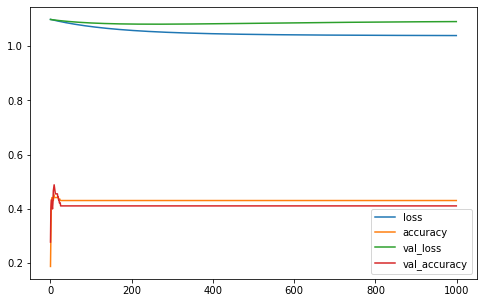

In [104]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.show()